Exporting the iris dataset and finding the flowers type there are three types of flower Exporting the iris dataset and finding the flowers type there are three types of flower 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [54]:
# Creating a NN

In [ ]:
class Model(nn.Module):
    def __init__(self,in_features = 4 , h1=8 ,h2=9,out_features = 3):
        super().__init__() #instance of our nn.Module 
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    def forward(self,x):
        x= f.relu(self.fc1(x))    #relu - rectified linear unit
        x=f.relu(self.fc2(x))
        x=f.relu(self.out(x))
        
        return x

In [56]:
torch.manual_seed(41)
#create a instance of model
model = Model()

In [57]:
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline


In [58]:
df1= pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df1.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [78]:
df1['species'] = df1['species'].replace('setosa',0.0)
df1['species'] = df1['species'].replace('versicolor',1.0)
df1['species'] = df1['species'].replace('virginica',2.0)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [79]:
x=df1.drop('species',axis = 1)
y = df1['species']

In [80]:
x=x.values
y=y.values

In [129]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state=41)

ValueError: Found input variables with inconsistent numbers of samples: [10, 150]

In [130]:
len(x_train)

120

In [131]:
len(x_test)

30

In [132]:
len(y_train)

120

convert x labels to float tensor 

convert y labels to long tensor

In [98]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [99]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

set the criterion of model to measure the error how far off the prediction are from the data


In [ ]:
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer ,lr= learning rate (if error doesn't go down after a bunch of iterations (epochs),lower your learning rate )
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [117]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [118]:
# train our model 
# Epochs (one run through all the training data in our network)
epochs = 100
loses =[]
for i in range(epochs):
    y_pred = model(x_train)  #get predicted 
    
    # measure the loss also 
    loss = criterion(y_pred,y_train) # predicted values vs the y_train
    loses.append(loss.detach().numpy())
    
    #print every 10 epoch
    if i%10 ==0 :
        print(f'Epoch: {i} and Loss:{loss}')
        
        # Do some back propagation: take the error rate of forward propagation and feed it back 
        #thru the network to fine tune the weights 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

Epoch: 0 and Loss:0.6576501727104187
Epoch: 10 and Loss:0.6385281682014465
Epoch: 20 and Loss:0.6185709834098816
Epoch: 30 and Loss:0.599887490272522
Epoch: 40 and Loss:0.5797800421714783
Epoch: 50 and Loss:0.5593571066856384
Epoch: 60 and Loss:0.539258599281311
Epoch: 70 and Loss:0.5192845463752747
Epoch: 80 and Loss:0.4988638460636139
Epoch: 90 and Loss:0.4790410101413727


Text(0.5, 0, 'epoch')

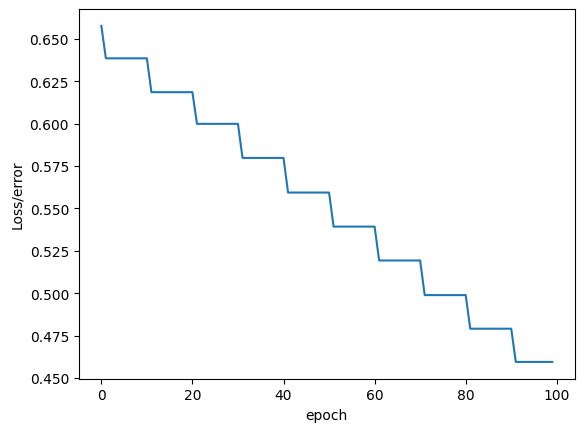

In [119]:
plt.plot(range(epochs),loses)
plt.ylabel('Loss/error')
plt.xlabel('epoch')

In [120]:
loss

tensor(0.4594, grad_fn=<NllLossBackward0>)

In [121]:
correct = 0 
with torch.no_grad():
    for i , data in enumerate(x_test):
        y_val = model.forward(data)
        
        if y_test[i]==0:
            x='setosa'
        elif y_test[i]==1:
            x='versicolor'
        else:
            x='virginica'
            
        
        # Will tell us what type of flower class oue network classes it is 
        print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
        
        #correct or not
        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'we Got {correct}!')

1.) tensor([0.0000, 1.7832, 2.3527]) 	 virginica 	 2
2.) tensor([0.0000, 2.0686, 3.2405]) 	 virginica 	 2
3.) tensor([0.0000, 2.2551, 3.5631]) 	 virginica 	 2
4.) tensor([0.0000, 1.6119, 1.6024]) 	 versicolor 	 1
5.) tensor([0.0000, 2.0397, 3.0049]) 	 virginica 	 2
6.) tensor([0.1550, 1.4245, 1.0779]) 	 versicolor 	 1
7.) tensor([0.0000, 1.8209, 2.3604]) 	 virginica 	 2
8.) tensor([0.0000, 1.6198, 1.6159]) 	 versicolor 	 1
9.) tensor([0.0000, 1.9346, 2.6956]) 	 virginica 	 2
10.) tensor([0.0000, 2.1796, 3.5014]) 	 virginica 	 2
11.) tensor([0.0000, 1.7988, 2.2978]) 	 virginica 	 2
12.) tensor([1.9395, 0.1446, 0.0000]) 	 setosa 	 0
13.) tensor([1.7820, 0.1879, 0.0000]) 	 setosa 	 0
14.) tensor([0.4035, 1.1476, 0.5815]) 	 versicolor 	 1
15.) tensor([1.6919, 0.3170, 0.0000]) 	 setosa 	 0
16.) tensor([0.0000, 1.7748, 2.1740]) 	 virginica 	 2
17.) tensor([1.8051, 0.1990, 0.0000]) 	 setosa 	 0
18.) tensor([0.0000, 1.8047, 2.3771]) 	 versicolor 	 2
19.) tensor([1.8766, 0.1619, 0.0000]) 	 seto

In [122]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [123]:
with torch.no_grad():
    print(model(new_iris))

tensor([1.8622, 0.1659, 0.0000])


In [124]:
new_iris2 = torch.tensor([6.5	,3.0	,5.2	,2.0])

In [125]:
with torch.no_grad():
    print(model(new_iris2))

tensor([0.0000, 1.9346, 2.6956])


In [126]:
torch.save(model.state_dict(),'Flower_iris_pred.pt')

In [127]:
new_model = Model()
new_model.load_state_dict(torch.load('Flower_iris_pred.pt'))

<All keys matched successfully>

In [128]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [1]:
#New Model

In [39]:
import torch 
import torch.nn as nn
import torch.nn.functional as f 
import torch.optim as optim 
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import seaborn as sns 
import matplotlib.pyplot as plt

In [41]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.out = nn.Linear(64,10)
    
    def forward(self,x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.out(x))
        return x

In [42]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='./data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=False)

In [43]:
model =NeuralNet()

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [45]:
epochs = 5 

for epoch in range(epochs):
    running_loss = 0
    for images,labels in train_loader:
        images = images.view(images.size(0),-1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f'Epoche {epochs+1} - Loss: {running_loss/len(train_loader)}')

Epoche 6 - Loss: 0.0024562985149782094
Epoche 6 - Loss: 0.004898466789392012
Epoche 6 - Loss: 0.0073188845791033845
Epoche 6 - Loss: 0.009699277277948505
Epoche 6 - Loss: 0.012071460040647592
Epoche 6 - Loss: 0.01445848880800357
Epoche 6 - Loss: 0.01682396128233562
Epoche 6 - Loss: 0.019182016854601375


Epoche 6 - Loss: 0.021485622249432464
Epoche 6 - Loss: 0.02376694236991248
Epoche 6 - Loss: 0.025994444706800904
Epoche 6 - Loss: 0.028234754289899553
Epoche 6 - Loss: 0.030378467746889157
Epoche 6 - Loss: 0.032563547081530475
Epoche 6 - Loss: 0.03466275200914981
Epoche 6 - Loss: 0.03674991374839343
Epoche 6 - Loss: 0.038796450156392825
Epoche 6 - Loss: 0.040917410016822406
Epoche 6 - Loss: 0.0429288218778842
Epoche 6 - Loss: 0.04493962600032912
Epoche 6 - Loss: 0.04687515187110982
Epoche 6 - Loss: 0.04875634029221687
Epoche 6 - Loss: 0.05057750149830572
Epoche 6 - Loss: 0.05219599776176501
Epoche 6 - Loss: 0.05394418115046487
Epoche 6 - Loss: 0.05564405605482903
Epoche 6 - Loss: 0.05727747432204452
Epoche 6 - Loss: 0.058841861260216885
Epoche 6 - Loss: 0.060598260176969745
Epoche 6 - Loss: 0.06201124902981431
Epoche 6 - Loss: 0.06349437831561448
Epoche 6 - Loss: 0.065122092837718
Epoche 6 - Loss: 0.06642227259271943
Epoche 6 - Loss: 0.06786471884896252
Epoche 6 - Loss: 0.0692563956734

In [46]:
correct =0 
total = 0
with torch.no_grad():
    for images,labels in test_loader:
        images = images.view(images.size(0),-1)
        outputs =model(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct+=(predicted == labels).sum().item()
acc = 100*correct / total
acc

87.72